In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

# 資料預處理

In [ ]:
import tensorflow.keras.utils as np_utils
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist 
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=x_train_image.reshape(-1,784).astype('float32')
x_test=x_test_image.reshape(-1,784).astype('float32')

In [ ]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [ ]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [ ]:
print('Train feature:',x_train_normalize.shape)
print('Train label:',y_train_onehot.shape)

Train feature: (60000, 784)
Train label: (60000, 10)


In [ ]:
print('Test feature:',x_test_normalize.shape)
print('Test label:',y_test_onehot.shape)

Test feature: (10000, 784)
Test label: (10000, 10)


In [ ]:
!ls ~/.keras/datasets

mnist.npz


# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(input_dim=784,
     kernel_initializer='normal',units=256, 
     activation='relu'))

In [ ]:
model.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


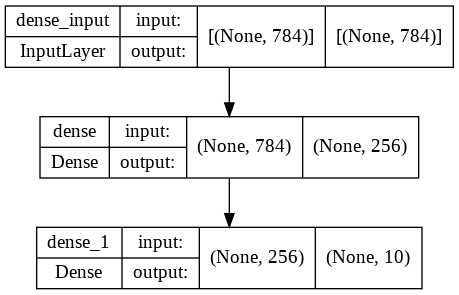

In [ ]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [ ]:
model.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [ ]:
train_history=model.fit(x=x_train_normalize,y=y_train_onehot,
       validation_split=0.2,batch_size=200,epochs=10,verbose=2)

Epoch 1/10
240/240 - 5s - loss: 0.4359 - acc: 0.8852 - val_loss: 0.2176 - val_acc: 0.9409 - 5s/epoch - 21ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1894 - acc: 0.9461 - val_loss: 0.1578 - val_acc: 0.9556 - 1s/epoch - 5ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1340 - acc: 0.9612 - val_loss: 0.1267 - val_acc: 0.9632 - 1s/epoch - 6ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1019 - acc: 0.9710 - val_loss: 0.1126 - val_acc: 0.9678 - 1s/epoch - 5ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0813 - acc: 0.9764 - val_loss: 0.1019 - val_acc: 0.9695 - 1s/epoch - 6ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0653 - acc: 0.9817 - val_loss: 0.0909 - val_acc: 0.9728 - 1s/epoch - 6ms/step
Epoch 7/10
240/240 - 2s - loss: 0.0548 - acc: 0.9848 - val_loss: 0.0902 - val_acc: 0.9716 - 2s/epoch - 6ms/step
Epoch 8/10
240/240 - 2s - loss: 0.0458 - acc: 0.9872 - val_loss: 0.0868 - val_acc: 0.9736 - 2s/epoch - 7ms/step
Epoch 9/10
240/240 - 1s - loss: 0.0378 - acc: 0.9902 - val_loss: 0.0811 - val_acc: 0.9752 - 1s/epoch - 

In [ ]:
train_history.history

{'acc': [0.8851666450500488,
  0.9461458325386047,
  0.9612083435058594,
  0.9710208177566528,
  0.9764166474342346,
  0.9817083477973938,
  0.9847708344459534,
  0.9872499704360962,
  0.9902083277702332,
  0.9914374947547913],
 'loss': [0.4359479248523712,
  0.1894155740737915,
  0.1339777261018753,
  0.10192743688821793,
  0.08128822594881058,
  0.06532756984233856,
  0.054754868149757385,
  0.04584857076406479,
  0.037773892283439636,
  0.03191692754626274],
 'val_acc': [0.9409166574478149,
  0.9555833339691162,
  0.9631666541099548,
  0.9677500128746033,
  0.9695000052452087,
  0.9728333353996277,
  0.9715833067893982,
  0.9735833406448364,
  0.9751666784286499,
  0.9757500290870667],
 'val_loss': [0.21759936213493347,
  0.15781055390834808,
  0.12669268250465393,
  0.11258839070796967,
  0.10187126696109772,
  0.0908920168876648,
  0.09018918871879578,
  0.08684216439723969,
  0.08109279721975327,
  0.0794229805469513]}

In [ ]:
train_history.history['val_acc']

[0.9409166574478149,
 0.9555833339691162,
 0.9631666541099548,
 0.9677500128746033,
 0.9695000052452087,
 0.9728333353996277,
 0.9715833067893982,
 0.9735833406448364,
 0.9751666784286499,
 0.9757500290870667]

# 以圖形顯示訓練過程

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

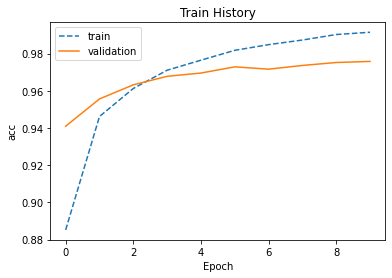

In [ ]:
show_train_history(train_history,'acc','val_acc')

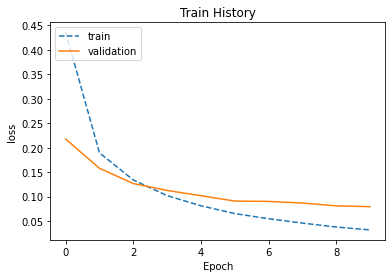

In [ ]:
show_train_history(train_history,'loss','val_loss') 

# 評估模型準確率

In [ ]:
scores=model.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 2s - loss: 0.0706 - acc: 0.9786 - 2s/epoch - 5ms/step


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.07061130553483963 test_acc= 0.978600025177002


# 進行預測

不能使用model.predict_classes

In [ ]:
#prediction= model.predict_classes(x_test_normalize)

In [ ]:
#prediction

建議使用model.predict +tf.argmax 取代

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [ ]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

model.predict(x)詳細介紹

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
probability.shape

(10000, 10)

In [ ]:
probability [:2]

array([[5.2272594e-07, 6.6186637e-08, 4.5550816e-05, 5.6664390e-04,
        8.7646168e-10, 5.4537388e-08, 5.5891028e-11, 9.9933177e-01,
        2.1330045e-05, 3.4038312e-05],
       [1.9663924e-08, 3.6677102e-05, 9.9993706e-01, 1.4489144e-05,
        1.6680103e-14, 8.1365379e-06, 4.6863171e-08, 8.4549000e-12,
        3.4068919e-06, 1.6698943e-11]], dtype=float32)

tf.argmax詳細介紹

In [ ]:
probability[0]

array([5.2272594e-07, 6.6186637e-08, 4.5550816e-05, 5.6664390e-04,
       8.7646168e-10, 5.4537388e-08, 5.5891028e-11, 9.9933177e-01,
       2.1330045e-05, 3.4038312e-05], dtype=float32)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [ ]:
prediction[0]

7

#顯示機率

In [ ]:
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[0][i])) 

0  Probability:0.000000523
1  Probability:0.000000066
2  Probability:0.000045551
3  Probability:0.000566644
4  Probability:0.000000001
5  Probability:0.000000055
6  Probability:0.000000000
7  Probability:0.999331772
8  Probability:0.000021330
9  Probability:0.000034038


In [ ]:
def show_predicted_probability(images,labels,
     prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',labels[idx])
  if len(labels)>0:print('predict:',prediction[idx])
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[idx][i])) 

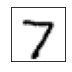

label: 7
predict: 7
0  Probability:0.000000523
1  Probability:0.000000066
2  Probability:0.000045551
3  Probability:0.000566644
4  Probability:0.000000001
5  Probability:0.000000055
6  Probability:0.000000000
7  Probability:0.999331772
8  Probability:0.000021330
9  Probability:0.000034038


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0)

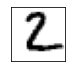

label: 2
predict: 2
0  Probability:0.000000020
1  Probability:0.000036677
2  Probability:0.999937057
3  Probability:0.000014489
4  Probability:0.000000000
5  Probability:0.000008137
6  Probability:0.000000047
7  Probability:0.000000000
8  Probability:0.000003407
9  Probability:0.000000000


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1)

In [ ]:
prediction=tf.argmax(probability, axis=1).numpy()

In [ ]:
prediction[0]

7

In [ ]:
prediction=tf.argmax(model.predict(x_test_normalize), axis=-1).numpy()

In [ ]:
prediction 

array([7, 2, 1, ..., 4, 5, 6])

#顯示預測結果

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

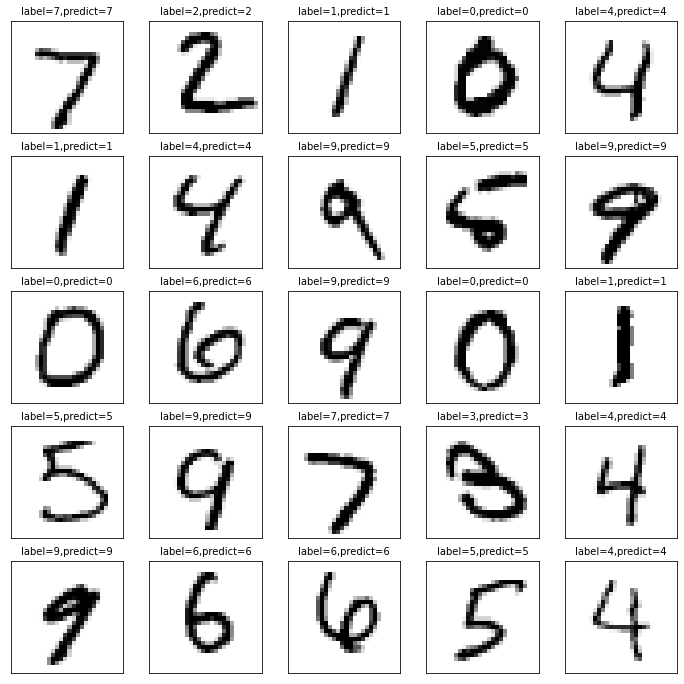

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=0,num=25)

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [ ]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,967,0,2,1,2,1,3,1,2,1
1,0,1124,4,0,0,1,2,0,4,0
2,4,1,1008,3,1,0,2,6,7,0
3,0,0,1,992,0,4,0,5,4,4
4,0,0,5,0,963,0,4,2,0,8
5,2,0,0,9,1,869,2,0,5,4
6,5,3,2,1,2,3,939,0,3,0
7,0,4,11,3,0,0,0,1001,2,7
8,3,1,4,8,4,3,2,2,945,2


# 查看預測錯誤資料

In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2597,5,3
2810,5,3
3902,5,3
4360,5,3
5937,5,3


# 查看預測錯誤資料

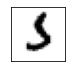

label: 5
predict: 3
0  Probability:0.000000084
1  Probability:0.000238512
2  Probability:0.000008521
3  Probability:0.878233671
4  Probability:0.000000443
5  Probability:0.121449746
6  Probability:0.000014078
7  Probability:0.000000135
8  Probability:0.000051126
9  Probability:0.000003686


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,340)

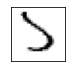

label: 5
predict: 3
0  Probability:0.000003172
1  Probability:0.001889616
2  Probability:0.002049442
3  Probability:0.968621731
4  Probability:0.000006333
5  Probability:0.025262255
6  Probability:0.000310225
7  Probability:0.000678461
8  Probability:0.000387011
9  Probability:0.000791789


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1393)